In [38]:
%matplotlib inline
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from sklearn.metrics import confusion_matrix
import itertools

# Read dataset

In [39]:
data = pd.read_csv('raw.csv', sep=',',engine='python')
df = data

In [40]:
data_new = df.dropna(subset=['ASH','INSUL','TAAV','RH','dayav_ta','dayav_rh','MET'])

In [41]:
# get features and thermal sensation
y = data_new['ASH']
x = data_new[['INSUL','TAAV','RH','dayav_ta','dayav_rh','MET']]
y = np.round(y)
np.array(x.iloc[0])

array([ 0.83      , 24.6       , 48.06770535, 23.        , 67.2207134 ,
        1.05802048])

In [42]:
from sklearn import preprocessing

In [43]:
# lab_enc = preprocessing.LabelEncoder()
# encoded = lab_enc.fit_transform(y)
# np.unique(encoded)

In [44]:
from sklearn import tree

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.1, random_state=0)

In [47]:
# train the model
clf = tree.DecisionTreeClassifier()
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train,y_train)

In [48]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [49]:
# predict the model
y_pred=clf.predict(X_test)
f1=f1_score(y_test, y_pred, average='weighted') 
r1=recall_score(y_test, y_pred, average='weighted') 
p1=precision_score(y_test,y_pred,average='weighted')
print(f1)
print(r1)
print(p1)

0.3677066407564333
0.4920212765957447
0.42604468725616923


In [50]:
# calculate accuracy
count = np.where(y_pred==y_test)
acc = np.shape(count)[1]/len(y_test)
acc

0.4920212765957447

In [51]:
m = 0
for i in range(len(y_test)):
    if (y_pred[i] == y_test.iloc[i]):
        m = m+1
    acc = m/len(y_test)
acc

0.4920212765957447

# cross validation

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
clf = tree.DecisionTreeClassifier(max_depth=5, criterion='entropy')
scores = cross_val_score(clf, x, y, cv=5)
scores

array([0.42251656, 0.43236074, 0.38215712, 0.32933333, 0.48796791])

In [54]:
clf = tree.DecisionTreeClassifier(max_depth=5)
scores = cross_val_score(clf, x, y, cv=5)
np.mean(scores)

0.36550608253565237

In [55]:
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, x, y, cv=5)
np.mean(scores)

0.1904381007959476

In [56]:
clf = tree.DecisionTreeClassifier(max_depth=5, criterion='entropy')
scores = cross_val_score(clf, x, y, cv=5)
np.mean(scores)

0.41113203478298843

# save model

In [57]:
clf = clf.fit(X_train,y_train)

In [58]:
import pickle

In [59]:
filename = "dt.sav"
pickle.dump(clf,open(filename,'wb'))

In [60]:
load_model = pickle.load(open('dt.sav','rb'))
test = np.array([[0.784,25,61,27.55,81.55,1.00]])
pred = load_model.predict(x)
np.unique(pred)

array([-3., -2., -1.,  0.,  1.,  2.])

# Confusion matrix

In [61]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
matrix_sensation = confusion_matrix(y, pred)

Confusion matrix, without normalization


3758

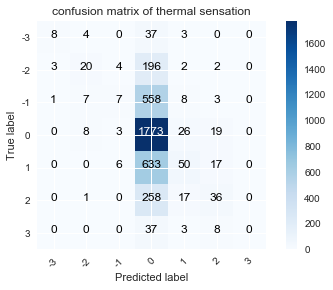

In [64]:
class_names = [-3,-2,-1,0,1,2,3]
plot_confusion_matrix(matrix_sensation,classes=class_names,
                      title='confusion matrix of thermal sensation')
np.sum(matrix_sensation)

# Visualization

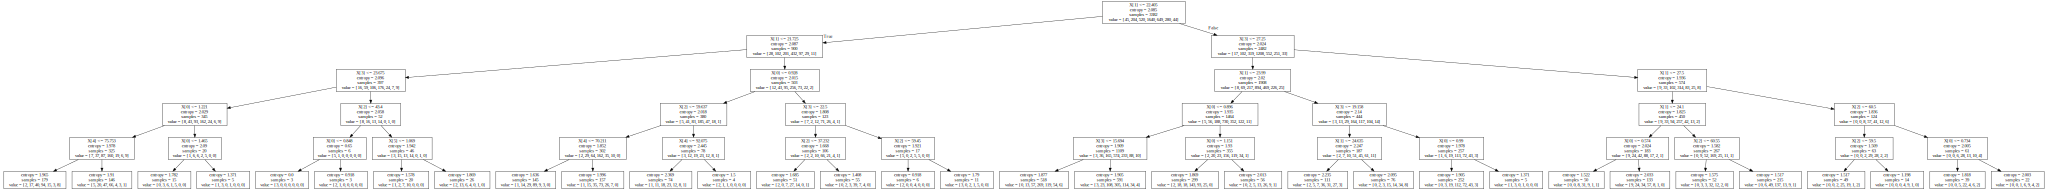

In [71]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph